### TP 4 : Les forêts aléatoires

Méthodes d’agrégation
Les méthodes ensemblistes (ou d’agrégation) pour les algorithmes d’apprentissage statistique 
(en anglais : ensemble learning) sont basées sur l’idée de combiner les prédictions de 
plusieurs prédicteurs (ou classifieurs) pour une meilleure généralisation et pour compenser les 
défauts éventuels de prédicteurs individuels.
En général, on distingue deux familles de méthodes de ce type :
   1. Méthodes par moyennage (bagging, forêts aléatoires) où le principe est de faire la 
moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction 
de variance de l’éstimateur moyenne.
   2. Méthodes adaptatives (boosting) où les paramètres sont itérativement adaptés pour 
produire un meilleur mélange.
Dans la suite nous explorerons chacune de ces classes d’algorithme en Scikit-learn et 
présenterons quelques comparaisons

* Dans cet exemple nous allons utiliser la base de données digits, qui contient 10 classes 
  (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 
  attributs (8 pixels par 8).

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

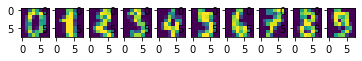

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    #print(digit)
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [4]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


Pour ce TP, nous allons utiliser comme classifieur de base un arbre de 
décision DecisionTreeClassifier. Ce classifieur nous permet d’établir des performances de 
référence (c’est un ensemble à 1 modèle)

In [5]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6891223733003708


Nous avons obtenue une valeur moyenne d'accuracy a améliorer

In [6]:
accuracy_list=[]
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracy_list.append(accuracy)
print(np.std(accuracy_list))    


0.027615435156353306


la valeur de la variance est réduite , sa reflete que la liste des accuracy obtenue ont presquues les meme valeurs.

### Comparaison : cas1_Methode de bagging
Les méthodes de type bagging construisent plusieurs instances d’un estimateur, calculées sur 
des échantillons aléatoires tirés de la base d’apprentissage (et éventuellement une partie des 
attributs, également sélectionnés de façon aléatoire), et ensuite combine les prédictions 
individuelles en réalisant leur moyenne pour réduire la variance de l’estimateur. Leur avantage 
principal réside dans le fait qu’ils construisent une version améliorée de l’algorithme de base, 
sans demander de modification de cet algorithme
###### - construisons maintenant un classifieur bagging sur nos données, toujours basé sur les DecisionTreeClassifier 

* Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test

In [9]:
list_baggin=[] 
for i in range(101):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.5, max_features=0.5, n_estimators=200)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_baggin.append(accuracy)
print(np.std(list_baggin))  
np.average(list_baggin)    

0.004208621416101351


0.904153765191105

d'aprés l'utilisation du classiffieur bagging , nous avons obtenu un ecart type plus bas que la methode classique , d'ou on peut conclure que le a methode bagging est plus précise que la deuxieme.









In [10]:
list_bag=[] 
for i in range(2,600,15):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.5, max_features=0.5, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag))  

0.05747933196953999


##### Construire le graphique accuracy vs n_estimators

Text(0, 0.5, 'Testing Accuracy')

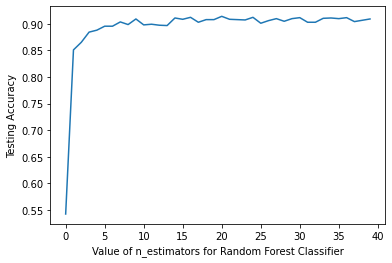

In [11]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

on remarque qu'appartir la 10 emme valeur de n_estamor , la valeur d'accuracy se stabilise

#### varions  les parametres max_samples et max_features. Pour quelles valeurs on obtient le meilleur résultat ? 

* cas 1 : choix de max_samples trés grand

In [100]:
list_bag=[] 
for i in range(2,200,5):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.9, max_features=0.5, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag))  

0.062304645102802224


Nous avons obtenue une valeur de variance des accuracy plus elevé qu'au paravant.

Text(0, 0.5, 'Testing Accuracy')

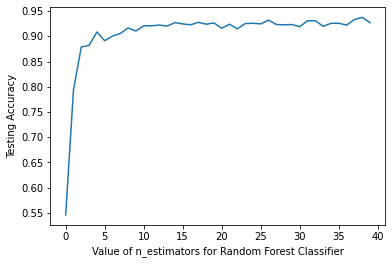

In [101]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Cependant on a besoin au minimaum de 10 arbres comme n_estimators pour obtenir une valeur maximal d'accuracy stable.

* cas 2 : choix de max_samples trés faible

In [14]:
list_bag=[] 
for i in range(2,200,5):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.2, max_features=0.5, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag))  

0.07914628412718196


Text(0, 0.5, 'Testing Accuracy')

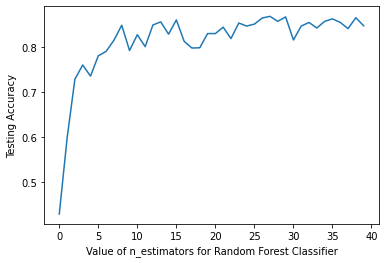

In [15]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Nous avons obtenue cette fois ci une valeur plus elevé de l'ecartype , est il exige la disponibilité d'aumoin30 arbres pour avoir une valeur d'accuracy maximaum

* cas 3 : choix de max_features trés faible

In [16]:
List_bag=[] 
for i in range(2,800,5):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.5, max_features=0.2, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag))

0.05981086493033997


Text(0, 0.5, 'Testing Accuracy')

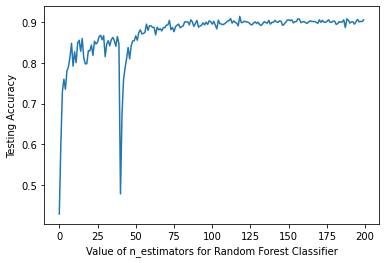

In [17]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Nous remarquons qu'il ya des chutes de la valeur d'accuraccy pour la valeur 30 de n_estimators , en suite on remarque une stabilité stricte .

* cas 4 : choix de max_features trés faible

In [18]:
List_bag=[] 
for i in range(2,500,5):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.5, max_features=0.9, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag)) 

0.05410752372242141


Text(0, 0.5, 'Testing Accuracy')

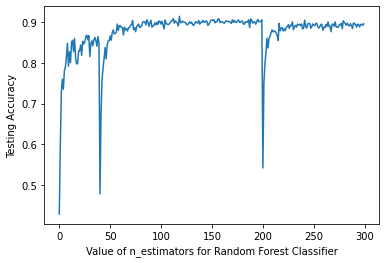

In [19]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Nous remarquons qu'il ya des chutes de la valeur d'accuraccy pour la valeur 30 et 200 de n_estimators , en suite on remarque une stabilité stricte aprés chaque chute .

* cas 3 : choix des valeurs de  max_features et max_samples  trés faibles

In [20]:
List_bag=[] 
for i in range(2,500,5):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.2, max_features=0.2, n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_bag.append(accuracy)
print(np.std(list_bag)) 

0.0621338549487392


Text(0, 0.5, 'Testing Accuracy')

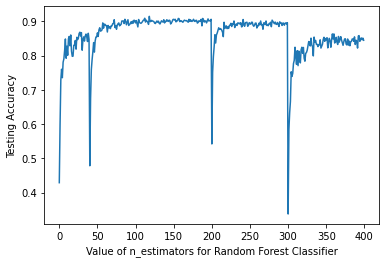

In [21]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_bag)), list_bag)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

on remarque qu'il y avait plus de chut q'avant accompagner d'une stabilité temporaire juste aprés chaque chute.

### REMARQUE:
Le cas du meilleur choix qu'on pourrait faire sont les valeur : max_samples=0.5, max_features=0.5

In [22]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

* En utilisant la methode GridSearchCV pour réaliser une recherche 
systématique.

In [23]:
for i in range(2,600,15):      
    lf = BaggingClassifier(tree.DecisionTreeClassifier(),
                               max_samples=0.5, max_features=0.5, n_estimators=i)

In [27]:
from sklearn.model_selection import GridSearchCV

max_samples=[]
for i in range(10,len(X_train),30):
    max_samples.append(i)    
    
max_features=[]
for i in range(64,len(X_train)*64,128):
    max_features.append(i)
    
list_crid=[]    
     
param_grid = {
    #'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'max_features': max_features,
    'max_samples': max_samples,
    #'n_estimators': [100, 200, 300]
}

#tree_para = {'criterion':['gini','entropy'],param_grid}
clf8 = GridSearchCV(lf, param_grid)
clf8.fit(X_train, y_train)
list_crid.append(clf8.predict(X_test))
accuracy=clf8.score(X_test,y_test)
print(accuracy)


0.8906056860321384


In [28]:
from sklearn.metrics import accuracy_score
print(f"Le taux d’éléments mal classifiés sur l’ensemble de test :q {1-accuracy_score(y_test, clf8.predict(X_test))} ")

Le taux d’éléments mal classifiés sur l’ensemble de test :q 0.10939431396786159 


*  nous avons eu des resultats trés positives qui depasse les 89 pourcent d'accuracy .

## RANDOM FOREST

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le 
même principe que le bagging, mais avec une étape supplémentaire de randomisation dans 
la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. 

* nous allons refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier.

In [41]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.90)

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.8831891223733004


- nous avons obtenu des resutats beaucoup mieux que ceux du methodes bagginggg . il s'agit d'une valeur qui dépasse 88% d'accuracy.

##### Construction de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.

In [32]:
list_RF=[] 
for i in range(101):      
    lf = RandomForestClassifier(n_estimators=200)
    lf.fit(X_train, y_train)
    y_pred = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_RF.append(accuracy)
print(np.std(list_RF))  
np.average(list_RF) 

0.0053736729358647315


0.8892349679961817

- Concernant la méthode bagging nous avons obtenue une valeur de 90% comme moyenne d'accuracy des 100 tirages , or qu'on a juste 88% pour la methodes RF .

 #### graphique accuracy vs n_estimators

In [38]:
list_RdF=[] 
for i in range(2,600,15):      
    lf = RandomForestClassifier(n_estimators=i)
    lf.fit(X_train, y_train)
    Z = lf.predict(X_test)
    accuracy=lf.score(X_test,y_test)
    list_RdF.append(accuracy)
print(np.std(list_RdF)) 
np.average(list_RdF) 

0.043148974882135045


0.8813967861557478

Text(0, 0.5, 'Testing Accuracy')

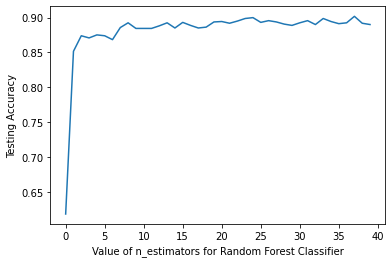

In [39]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_RdF)), list_RdF)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

la valeur d'accuracy commence à se stabiliser à  la valeur 0.90 apartir du 15 n_estimators 20.or pour la methode bagging on a remarqué la stabilité d'accuraccy à la méme valeur (0.90) mais il exige la disponibilité d'aumoin 10 estimators.

 #### la classification avec les ExtraTreesClassifier : 

- Nous faisons  la classification avec ce type de classifieur. et on va le comparer avec RandomForestClassifier.

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
cllf = ExtraTreesClassifier(n_estimators=200, random_state=0)
cllf.fit(X_train, y_train)
y_pred = cllf.predict(X_test)
accuracy = cllf.score(X_test,y_test)
print(accuracy)

0.9493201483312732


In [60]:
list_Extra=[] 
for i in range(2,600,20):      
    clllf = ExtraTreesClassifier(n_estimators=i, random_state=0)
    clllf.fit(X_train, y_train)
    Z = clllf.predict(X_test)
    accuracy=clllf.score(X_test,y_test)
    list_Extra.append(accuracy)
print(np.std(list_Extra)) 
np.average(list_Extra) 

0.055792391044273075


0.937886279357231

Text(0, 0.5, 'Testing Accuracy')

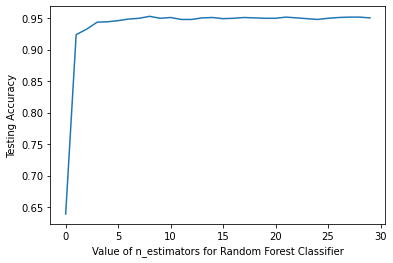

In [61]:
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(len(list_Extra)), list_Extra)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Nous avons obtenu des résultats d'accuracy beacoup mieux que le random forest , nous avons obtenue plus que 96% accompagné d'une stabilité appartir de 5 estimateurs .

### Boosting

Le principe du boosting est d’évaluer une séquence de classifieurs faibles (weak learners) sur 
plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions 
obtenues sont alors combinées par une somme pondérée pour obtenir le modèle final.

- nous allons refaire la classification sur la base Digits en utilisant un 
classifieur RandomForestClassifier 

In [62]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8967861557478368


Nous avons obtenu une valeur qui depasse 89% d'accuracy pour ce modéle.

#### cas1 : variation du parametre max_depth :

In [86]:
accurac=[]
ind=[]
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
for i in range(1,101,10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),
    n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    ind.append(i)
    accurac.append(clf.score(X_test, y_test))


Text(0, 0.5, ' Accuracy')

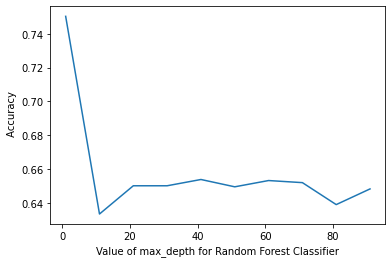

In [87]:
import matplotlib.pyplot as plt
plt.plot(ind,accurac)
plt.xlabel('Value of max_depth for Random Forest Classifier')
plt.ylabel(' Accuracy')

On remarque que :
- entre l'intervalle [0,10] l'accuracy commence à dimunuer de sa valeur maximale (plus de 74%) vers une valeur minimale.
- A partir de la valeur de max_depth>20 , la valeur d'accuracy  a se stabiliser à la valeur 65%

Donc ce qu'on peut conclure que les meilleur valeurs qu'on pourait prendre seront entre [1,5] ,

#### cas2 : variation du parametre rate_learning :

In [102]:
accur=[]
ind=[]
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
for i in range(1,80,10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
    n_estimators=200, learning_rate=i)
    clf.fit(X_train, y_train)
    ind.append(i)
    accur.append(clf.score(X_test, y_test))


Text(0, 0.5, ' Accuracy')

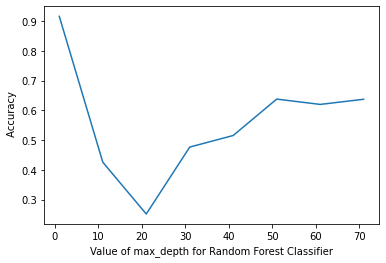

In [103]:
import matplotlib.pyplot as plt
plt.plot(ind,accur)
plt.xlabel('Value of max_depth for Random Forest Classifier')
plt.ylabel(' Accuracy')

On remarque que :
* entre l'intervalle [0,10] l'accuracy commence à dimunuer de sa valeur maximale (plus de 74%) vers une valeur de 40%.
* A partir de la valeur de max_depth>20 , la valeur commence à s'ogmmenter .

Donc ce qu'on peut conclure que les meilleur valeurs qu'on pourait prendre seront entre [1,5] , ou une valeur supérrieur à 60.

#### cas3 : variation du nombre d'estimateurs:

In [97]:
acc=[]
ind=[]
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
for i in range(1,201,10):
    clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
    n_estimators=i, learning_rate=2)
    clf.fit(X_train, y_train)
    ind.append(i)
    acc.append(clf.score(X_test, y_test))


Text(0, 0.5, ' Accuracy')

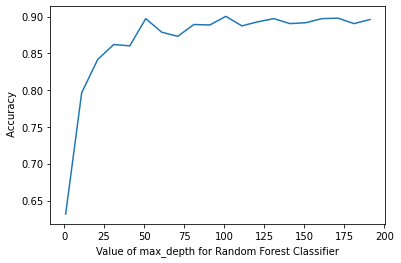

In [98]:
import matplotlib.pyplot as plt
plt.plot(ind,acc)
plt.xlabel('Value of max_depth for Random Forest Classifier')
plt.ylabel(' Accuracy')

Pour ce models applqué sur le jeu de données degits , on peut remarqué qu'on pourrait avoir la stabilité  d'accuracy à une valeur aximale sera avec un choix de minimaum 100 estimators .